1. IMPORT USUAL LIBRARIES

In [39]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

2. LOAD MASTER DATASET AS PANDAS DATAFRAME

In [40]:
# load in the master dataset
orig_data = pd.read_csv('allData.csv')

3. EXPLORE THE INITAL DATASET

In [41]:
# running describe
orig_data.describe()

,Year,Decibel_Level,Green_Space_Area,Air_Quality_Index,Happiness_Score,Cost_of_Living_Index,Healthcare_Index
count,596.000000,596.000000,596.000000,596.000000,596.000000,596.000000,596.000000
mean,2026.417785,57.340604,996.484899,40.486577,-40.434228,35.025168,92.283557
std,1.923307,7.201757,780.076123,37.593779,43.064520,26.043745,11.079778
min,2024.000000,50.000000,5.000000,5.000000,-122.900000,20.000000,35.000000
25%,2025.000000,55.000000,193.750000,25.000000,-78.275000,20.000000,95.000000
50%,2026.000000,55.000000,937.500000,30.000000,-33.650000,25.000000,96.000000
75%,2028.000000,60.000000,1681.250000,35.000000,4.200000,25.000000,97.000000
max,2030.000000,90.000000,2425.000000,245.000000,8.700000,130.000000,104.000000


In [42]:
# number of na values in each column
orig_data.isna().sum()

City                    0
Month                   0
Year                    0
Decibel_Level           0
Traffic_Density         0
Green_Space_Area        0
Air_Quality_Index       0
Happiness_Score         0
Cost_of_Living_Index    0
Healthcare_Index        0
dtype: int64

In [43]:
orig_data.head()

,City,Month,Year,Decibel_Level,Traffic_Density,Green_Space_Area,Air_Quality_Index,Happiness_Score,Cost_of_Living_Index,Healthcare_Index
0,New York,January,2024,70,High,35,40,6.5,100,80
1,Los Angeles,January,2024,65,Medium,40,50,6.8,90,75
2,Chicago,January,2024,60,Medium,30,55,7.0,85,70
3,London,January,2024,55,High,50,60,7.2,110,85
4,Paris,January,2024,60,High,45,65,6.9,95,80


In [44]:
orig_data.tail()

,City,Month,Year,Decibel_Level,Traffic_Density,Green_Space_Area,Air_Quality_Index,Happiness_Score,Cost_of_Living_Index,Healthcare_Index
591,Vancouver,September,2030,60,Medium,55,35,7.6,110,90
592,Wellington,September,2030,55,Low,80,30,8.4,90,94
593,Xalapa,September,2030,65,High,30,90,5.2,55,70
594,Yellowknife,September,2030,60,Low,55,40,7.3,100,88
595,Zagreb,September,2030,65,Medium,40,75,6.9,65,80


In [45]:
categorical_col = ['City', 'Month', 'Year', 'Traffic_Density']
numerical_col = ['Decibel_Level','Green_Space_Area','Air_Quality_Index','Happiness_Score','Cost_of_Living_Index','Healthcare_Index']

4. Q1: How many NA values are there in this dataset?
- There are 0 NA values in this dataset

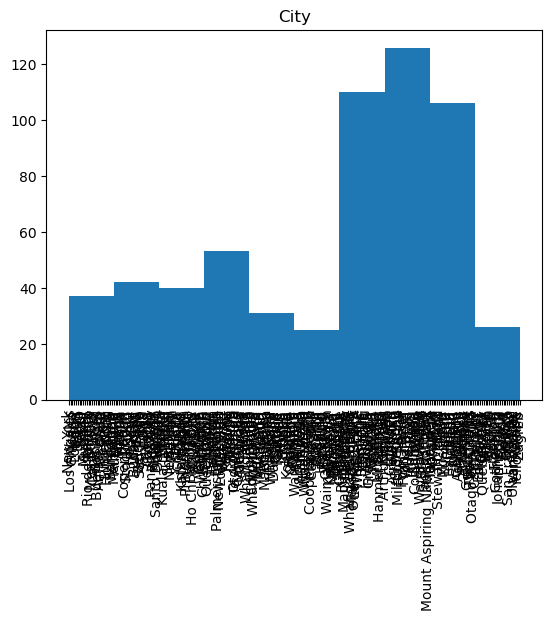

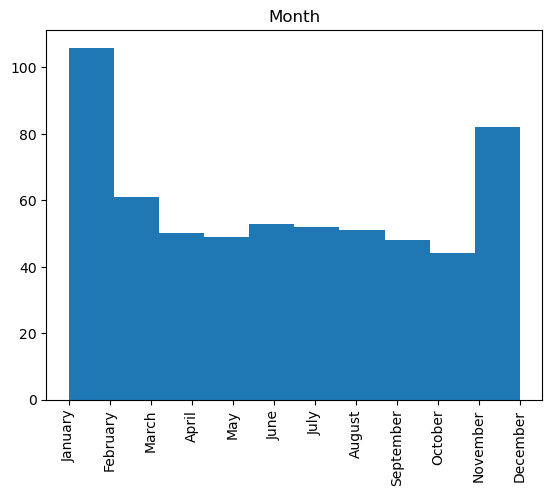

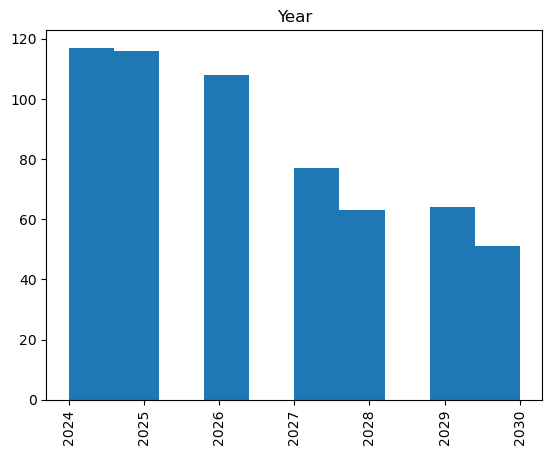

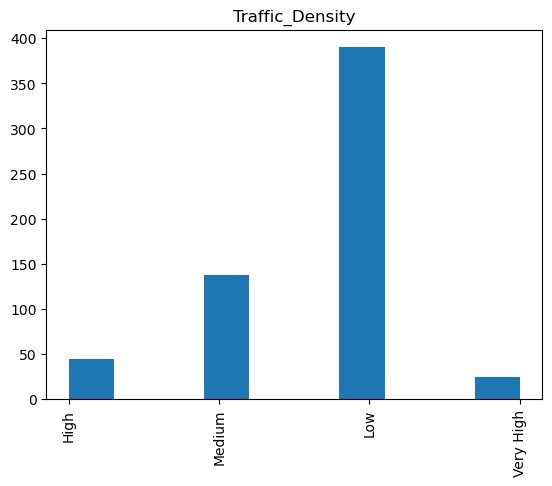

In [46]:
for col in categorical_col:
    plt.hist(orig_data[col])
    plt.xticks(rotation=90)
    plt.title(col)
    plt.show()

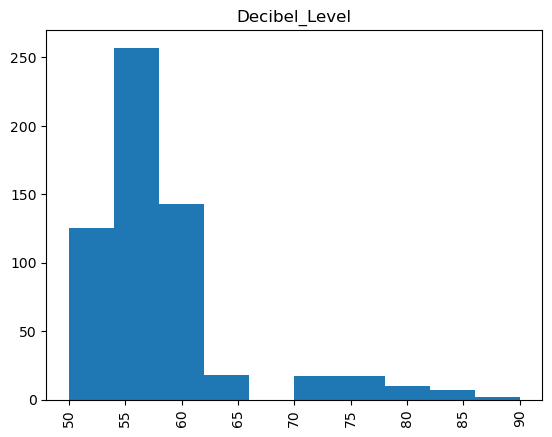

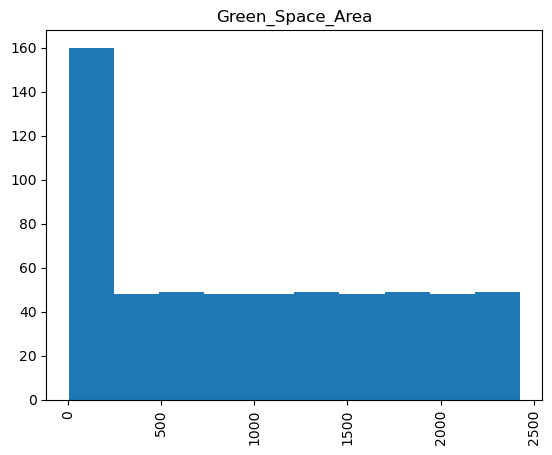

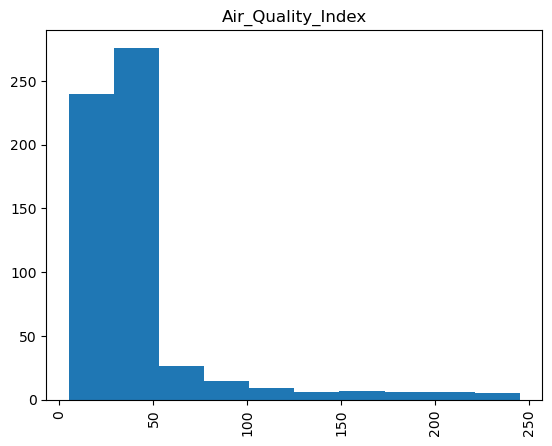

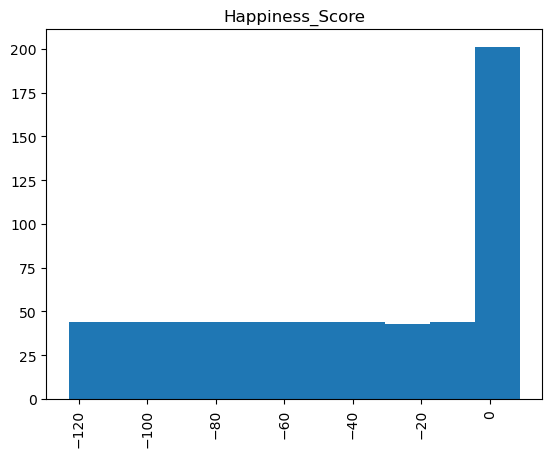

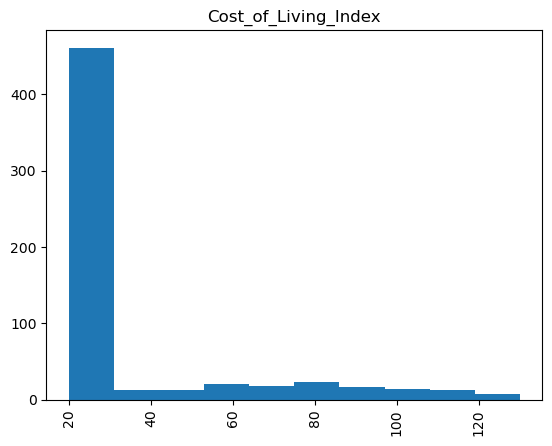

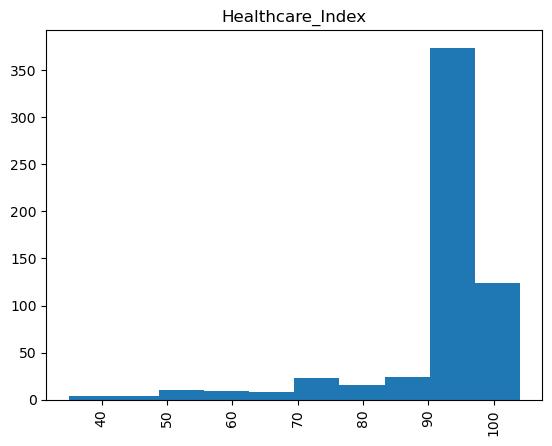

In [47]:
for col in numerical_col:
    plt.hist(orig_data[col])
    plt.xticks(rotation=90)
    plt.title(col)
    plt.show()

8. Q2: For each categorical column, state whether you plan on doing onehot encoding or label encoding
- I plan to use label encoding for the categorical columns of month, year, and traffic density. I want to use label encoding on these columns because each of these has an inherent order. There are ceratin maonths that come before other and the same applies to years. With traffic density there is an order as well, starting at low traffic density going up to very high traffic density.

- For the city categorical column I plan to use one hot encoding to prevent creating an order to the cities after it is encoded.

9. Econding the columns

- 9.1 Defining the getLabelList() function

In [48]:
def getLabelList(n):
    labelList=[]
    for i in range(n):
        labelList.append(i)
    return labelList

- 9.2 Make month list

In [49]:
monthList = ['January','February','March','April','May','June','July','August','September','October','November','December']

- 9.3 Replace values of month with their encoded value

In [50]:
orig_data['Month'] = orig_data['Month'].replace(monthList,getLabelList(len(monthList)))

- 9.4 Print out the head and tail of your DF and confirm that the months have been encoded properly.

In [51]:
orig_data.head()

,City,Month,Year,Decibel_Level,Traffic_Density,Green_Space_Area,Air_Quality_Index,Happiness_Score,Cost_of_Living_Index,Healthcare_Index
0,New York,0,2024,70,High,35,40,6.5,100,80
1,Los Angeles,0,2024,65,Medium,40,50,6.8,90,75
2,Chicago,0,2024,60,Medium,30,55,7.0,85,70
3,London,0,2024,55,High,50,60,7.2,110,85
4,Paris,0,2024,60,High,45,65,6.9,95,80


In [52]:
orig_data.tail()

,City,Month,Year,Decibel_Level,Traffic_Density,Green_Space_Area,Air_Quality_Index,Happiness_Score,Cost_of_Living_Index,Healthcare_Index
591,Vancouver,8,2030,60,Medium,55,35,7.6,110,90
592,Wellington,8,2030,55,Low,80,30,8.4,90,94
593,Xalapa,8,2030,65,High,30,90,5.2,55,70
594,Yellowknife,8,2030,60,Low,55,40,7.3,100,88
595,Zagreb,8,2030,65,Medium,40,75,6.9,65,80


- 9.5 Repeat this process for the other columns that should be label encoded.

In [53]:
yearList = [2024,2025,2026,2027,2028,2029,2030]

In [55]:
orig_data['Year'] = orig_data['Year'].replace(yearList,getLabelList(len(yearList)))

In [56]:
orig_data.head()

,City,Month,Year,Decibel_Level,Traffic_Density,Green_Space_Area,Air_Quality_Index,Happiness_Score,Cost_of_Living_Index,Healthcare_Index
0,New York,0,0,70,High,35,40,6.5,100,80
1,Los Angeles,0,0,65,Medium,40,50,6.8,90,75
2,Chicago,0,0,60,Medium,30,55,7.0,85,70
3,London,0,0,55,High,50,60,7.2,110,85
4,Paris,0,0,60,High,45,65,6.9,95,80


In [57]:
orig_data.tail()

,City,Month,Year,Decibel_Level,Traffic_Density,Green_Space_Area,Air_Quality_Index,Happiness_Score,Cost_of_Living_Index,Healthcare_Index
591,Vancouver,8,6,60,Medium,55,35,7.6,110,90
592,Wellington,8,6,55,Low,80,30,8.4,90,94
593,Xalapa,8,6,65,High,30,90,5.2,55,70
594,Yellowknife,8,6,60,Low,55,40,7.3,100,88
595,Zagreb,8,6,65,Medium,40,75,6.9,65,80


In [58]:
trafficList = ['Low','Medium','High','Very High']

In [59]:
orig_data['Traffic_Density'] = orig_data['Traffic_Density'].replace(trafficList,getLabelList(len(trafficList)))

In [60]:
orig_data.head()

,City,Month,Year,Decibel_Level,Traffic_Density,Green_Space_Area,Air_Quality_Index,Happiness_Score,Cost_of_Living_Index,Healthcare_Index
0,New York,0,0,70,2,35,40,6.5,100,80
1,Los Angeles,0,0,65,1,40,50,6.8,90,75
2,Chicago,0,0,60,1,30,55,7.0,85,70
3,London,0,0,55,2,50,60,7.2,110,85
4,Paris,0,0,60,2,45,65,6.9,95,80


In [61]:
orig_data.tail()

,City,Month,Year,Decibel_Level,Traffic_Density,Green_Space_Area,Air_Quality_Index,Happiness_Score,Cost_of_Living_Index,Healthcare_Index
591,Vancouver,8,6,60,1,55,35,7.6,110,90
592,Wellington,8,6,55,0,80,30,8.4,90,94
593,Xalapa,8,6,65,2,30,90,5.2,55,70
594,Yellowknife,8,6,60,0,55,40,7.3,100,88
595,Zagreb,8,6,65,1,40,75,6.9,65,80


10. Encode any columns that need one hot encoding

In [62]:
from sklearn.preprocessing import OneHotEncoder

#creating instance of one-hot-encoder
#sparse = False puts it in format where it can be dataframe later
encoder = OneHotEncoder(sparse=False)

#perform one-hot encoding on 'Country' column 
encodedData = encoder.fit_transform(orig_data[['City']])

encoder.categories_

/Users/bretttracy/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[array(['Adelaide', 'Amberley', 'Amsterdam', 'Aranga', 'Arrowtown',
        "Arthur's Pass", 'Ashburton', 'Athens', 'Auckland', 'Awanui',
        'Balclutha', 'Bangalore', 'Bangkok', 'Barcelona', 'Beijing',
        'Belgrade', 'Berlin', 'Blenheim', 'Bluff', 'Bogota', 'Boston',
        'Brisbane', 'Budapest', 'Buenos Aires', 'Cable Bay', 'Cairo',
        'Cambridge', 'Canberra', 'Canterbury', 'Cape Town', 'Caracas',
        'Chicago', 'Christchurch', 'Clinton', 'Collingwood', 'Colombo',
        'Coopers Beach', 'Copenhagen', 'Coromandel', 'Cromwell',
        'Dargaville', 'Denver', 'Dhaka', 'Dubai', 'Dublin', 'Dunedin',
        'Edinburgh', 'Florence', 'Fox Glacier', 'Frankfurt', 'Franz Josef',
        'Geneva', 'Geraldine', 'Gisborne', 'Glenbervie', 'Glenorchy',
        'Golden Bay', 'Gore', 'Gothenburg', 'Greymouth', 'Haast',
        'Hamilton', 'Hanmer Springs', 'Hanoi', 'Harihari', 'Hastings',
        'Havana', 'Havelock', 'Helsinki', 'Herekino', 'Hikurangi',
        'Ho Chi Minh Ci

In [69]:
# creates a pandas dataframe out of the encoded categories
oneHotDF = pd.DataFrame(encodedData,columns=encoder.categories_)
oneHotDF.head()

,Adelaide,Amberley,Amsterdam,Aranga,Arrowtown,Arthur's Pass,Ashburton,Athens,Auckland,Awanui,...,Whangaruru,Whataroa,Whitianga,Xalapa,Xiamen,Yangon,Yellowknife,Yerevan,Zagreb,Zurich
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [73]:
# change the level of the column indices to 0 (gets ride of the weird formatting)
oneHotDF.columns = oneHotDF.columns.get_level_values(0)
oneHotDF.head()

,Adelaide,Amberley,Amsterdam,Aranga,Arrowtown,Arthur's Pass,Ashburton,Athens,Auckland,Awanui,...,Whangaruru,Whataroa,Whitianga,Xalapa,Xiamen,Yangon,Yellowknife,Yerevan,Zagreb,Zurich
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [74]:
# concatenate the the original dataframe with the one hot encoded data frame for cities
encoded_DF = pd.concat([orig_data, oneHotDF], axis=1).drop(columns = "City")
encoded_DF.head()

,Month,Year,Decibel_Level,Traffic_Density,Green_Space_Area,Air_Quality_Index,Happiness_Score,Cost_of_Living_Index,Healthcare_Index,Adelaide,...,Whangaruru,Whataroa,Whitianga,Xalapa,Xiamen,Yangon,Yellowknife,Yerevan,Zagreb,Zurich
0,0,0,70,2,35,40,6.5,100,80,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,65,1,40,50,6.8,90,75,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0,60,1,30,55,7.0,85,70,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,55,2,50,60,7.2,110,85,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,60,2,45,65,6.9,95,80,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


11. Make boxplots for all numerical columns

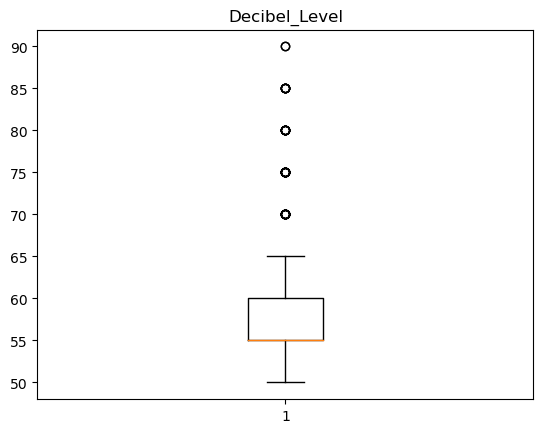

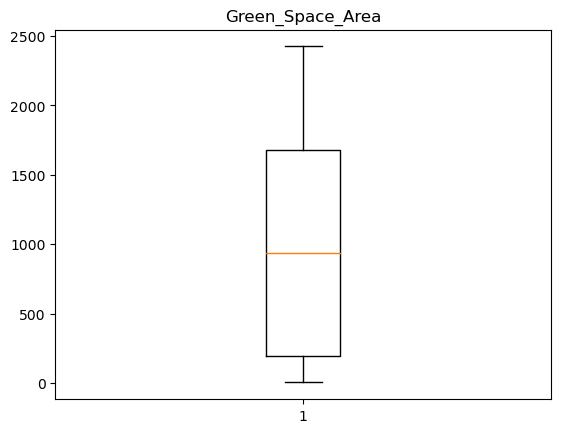

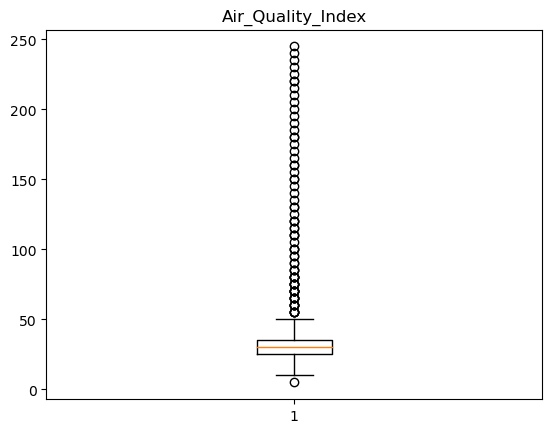

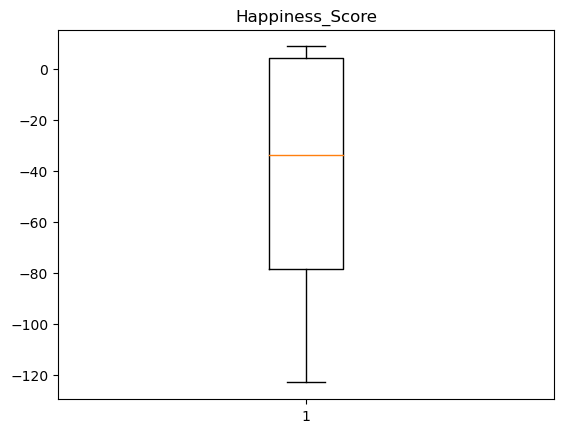

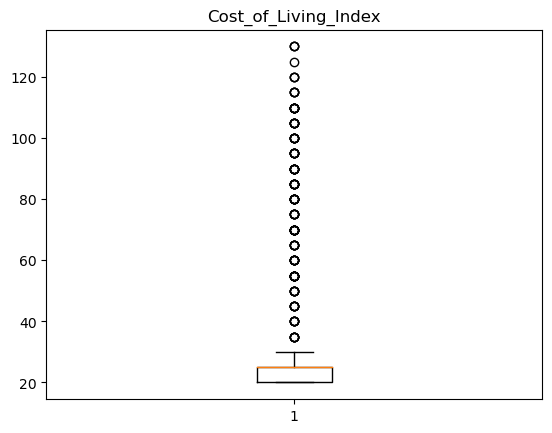

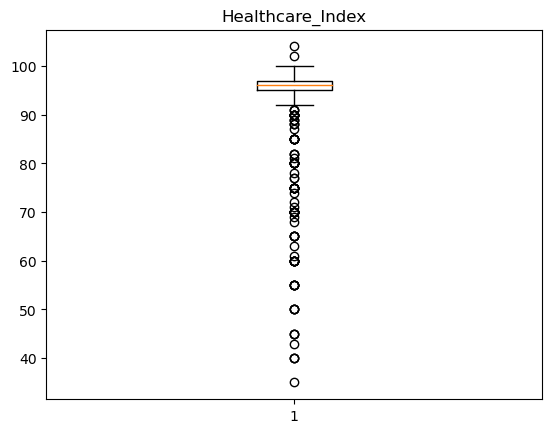

In [77]:
for col in numerical_col:
    plt.boxplot(encoded_DF[col])
    plt.title(col)
    plt.show()

12. Q3: What columns seem to have outliers?
- The columns that seem to have outliers are Decibel_Level, Air_Quality_Index, Cost_of_Living_Index, Healthcare_Index

13. Removing Outliers

In [82]:
for col in numerical_col:
    # calculate IQR
    Q1 = np.percentile(encoded_DF[col], 25, method='midpoint')
    Q3 = np.percentile(encoded_DF[col], 75, method='midpoint')
    IQR = Q3 - Q1

    # calculate thresholds
    maxThreshold = Q3+1.5*IQR
    minThreshold = Q1-1.5*IQR

    # remove the outliers
    iqrDF = encoded_DF[encoded_DF[col] < maxThreshold]
    iqrDF = iqrDF[iqrDF[col] > minThreshold]


In [89]:
print(encoded_DF.shape)

(596, 261)


In [87]:
print(iqrDF.shape)

(489, 261)


14. Q4: Which outlier removal method did you decide to use? Why?
- I decided to remove outliers using IQR. I decided to use IQR because I do not have deep enough understanding to set a hard coded threshold. I did not use z-score because according to the histograms at the top of this notebook, the numerical variables are not normally distributed which is the type of distribution z-scores work best with.


15. Q5: print out the shape of your dataframe before you remove outliers and after. How many rows of data did you have before you removed outliers, and how many rows did you have after you removed the outliers?
- There were 596 rows before removing outliers.
- After removing outliers there are 489 rows.

16. Scaling the features

In [90]:
# normalization
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# initialize the DF
normalizedDF = iqrDF

# normalize each column in the numerical col list
for col in numerical_col:
    normalizedDF[[col]] = scaler.fit_transform(iqrDF[[col]])

normalizedDF.head()

,Month,Year,Decibel_Level,Traffic_Density,Green_Space_Area,Air_Quality_Index,Happiness_Score,Cost_of_Living_Index,Healthcare_Index,Adelaide,...,Whangaruru,Whataroa,Whitianga,Xalapa,Xiamen,Yangon,Yellowknife,Yerevan,Zagreb,Zurich
20,2,0,1.000000,2,0.004184,1.000000,0.987833,0.954545,0.333333,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26,2,0,0.000000,0,0.018828,0.545455,0.996198,0.727273,0.333333,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29,2,0,0.333333,0,0.014644,0.454545,0.996958,0.681818,0.333333,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31,3,0,0.000000,0,0.016736,0.545455,0.997719,0.818182,0.833333,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32,3,0,0.333333,0,0.018828,0.454545,0.995437,0.727273,0.666667,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


17. Q6: Did you decide to use normalization or standardization? Why?
- I chose to use normalization because the distribution of the numerical columns look too far from a normal distribution for standardization to perform well.

18. Making two dataframes:
- xDF- a dataframe with all of your cleaned data EXCEPT for the happiness score column
- yDF- a dataframe with ONLY the happiness score column.

In [92]:
xDF = normalizedDF.drop('Happiness_Score',axis=1)
yDF = normalizedDF['Happiness_Score']

19. Split your data into a training set and testing set.

In [95]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(xDF, yDF, test_size=0.3)

20. Train machine learning models

In [96]:
# import linear regression and r^2 score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

model = LinearRegression().fit(X_train,y_train)

preds = model.predict(X_test)

r2_score(y_test,preds)

-1.1384990600583448e+18

In [97]:
# import Support Vector Classifier
from sklearn.svm import SVR

# train the model
model = SVR().fit(X_train,y_train)

# make predictions
preds = model.predict(X_test)

# compate true and predicted values
r2_score(y_test,preds)

0.9294362545336161

In [98]:
# import Decision Tree
from sklearn.tree import DecisionTreeRegressor

# train the model
model = DecisionTreeRegressor().fit(X_train,y_train)

# make predictions
preds = model.predict(X_test)

# compare true and predicted values
r2_score(y_test,preds)

0.9997536848904793

In [99]:
# import Neural Network
from sklearn.neural_network import MLPRegressor

# train the model
model = MLPRegressor().fit(X_train,y_train)

# make predictions
preds = model.predict(X_test)

# compare true and predicted values
r2_score(y_test,preds)

0.9175313560195838